#### Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar datos
df_donantesi = pd.read_csv('./Archivos_Cliente/Base_donantes.csv', encoding='latin-1')
df_donantesi.set_index('PSN', inplace=True)
df_donantesi.head()

/var/folders/xq/zz5zb6z90_73_lf9wzs007h40000gn/T/ipykernel_62488/1927339027.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_donantesi = pd.read_csv('./Archivos_Cliente/Base_donantes.csv', encoding='latin-1')


,Tipo de registro del contacto,Fecha de nacimiento,Fecha Aniversario Pago,Edad,Fecha de Captación,Monto Actual,Género,Estado Civil,Cantidad de Hijos,Tiene hijos,Ocupación,Churn Probability,Lapsed Probability,RFM Segmento Actual,Otra Clasificación RFM Actual,Cantidad Cuotas Pagadas Global,Cantidad Cuotas No Pagadas Global,Campaña Inicial: Nombre,Donante Activo
PSN,,,,,,,,,,,,,,,,,,,
1020438646,Donante,1/12/1994,NaN,29.0,10/26/2018,NaN,Femenino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,0
1020276703,Donante,11/7/1990,Nº de error,32.0,12/29/2015,20000.0,Femenino,Soltero,NaN,No,Tecnólogo,NaN,NaN,Otra Clasificación,Extraviados,12,80,SPIF F2F 2016,0
1020490284,Donante,9/29/1994,3/1/2023,28.0,2/18/2023,30000.0,Femenino,NaN,1,Si,NaN,0.56,51.0,Otra Clasificación,Constantes,3,0,COF2FR.F.2023,0
1020184782,Donante,8/13/1973,10/31/2023,49.0,6/24/2015,20000.0,Masculino,Soltero,1,Si,NaN,NaN,NaN,Otra Clasificación,Extraviados,12,12,SPIF F2F 2015,0
1020476125,Donante,9/6/1986,NaN,36.0,4/13/2022,30000.0,Femenino,Soltero,2,Si,Asesor de gestión,NaN,NaN,NaN,NaN,0,2,COWCB R.F.2022,0


#### Preprocesamiento de Datos

In [3]:
# Remover los registros que tienen "N° de error" en la columna Fecha Aniversario Pago
df_donantesi = df_donantesi[df_donantesi['Fecha Aniversario Pago']!='Nº de error']
# Remover los registros inactivos
df_donantesi = df_donantesi[df_donantesi['Donante Activo']==1]
# Remover registros menores de edad
df_donantesi = df_donantesi[df_donantesi['Edad']>=18]
# Remover registros mayores de 90 años
df_donantesi = df_donantesi[df_donantesi['Edad']<=90]
# Reemplazar textos de la cantidad de hijos
df_donantesi['Cantidad de Hijos'] = df_donantesi['Cantidad de Hijos'].replace('mas de 10', 10)
df_donantesi['Cantidad de Hijos'] = df_donantesi['Cantidad de Hijos'].astype(float)
# Llenar faltantes de tiene hijos
df_donantesi['Tiene hijos'] = np.where(df_donantesi['Cantidad de Hijos']>0.0, 'Si', 'No')
# Llenar faltantes de cantidad de hijos
df_donantesi['Cantidad de Hijos'] = np.where(df_donantesi['Tiene hijos']=='No', 0, df_donantesi['Cantidad de Hijos'])
# Cambiar tipos de dato
df_donantesi['Fecha de Captación'] = pd.to_datetime(df_donantesi['Fecha de Captación'])
df_donantesi['Tipo de registro del contacto'] = df_donantesi['Tipo de registro del contacto'].astype('category')
df_donantesi['Fecha de nacimiento'] = pd.to_datetime(df_donantesi['Fecha de nacimiento'])
df_donantesi['Fecha Aniversario Pago'] = pd.to_datetime(df_donantesi['Fecha Aniversario Pago'])
df_donantesi['Género'] = df_donantesi['Género'].astype('category')
df_donantesi['Estado Civil'] = df_donantesi['Estado Civil'].astype('category')
df_donantesi['Tiene hijos'] = df_donantesi['Tiene hijos'].astype('category')
# Reemplazar NaNs en Fecha Aniversario Pago con la Fecha de Captacion
df_donantesi['Fecha Aniversario Pago'] = np.where(df_donantesi['Fecha Aniversario Pago'].isna(), df_donantesi['Fecha de Captación'], df_donantesi['Fecha Aniversario Pago'])
# Cambiar el año de Fecha Aniversario Pago por 2023
df_donantesi['Fecha Aniversario Pago'] = df_donantesi['Fecha Aniversario Pago'].apply(lambda x: x.replace(year=2023))
# Obtener mes de la fecha actual
today = dt.datetime.now().month
# Remover registros con menos de 3 meses de fecha de captación
df_donantesi = df_donantesi[df_donantesi['Fecha de Captación']<dt.datetime(2023, today-3, 1) - dt.timedelta(days=90)]
# Corregir Churn Probability
df_donantesi['Churn Probability'] = np.where(df_donantesi['Churn Probability']>1, df_donantesi['Churn Probability']/100, df_donantesi['Churn Probability'])
# Corregir Lapsed Probability
df_donantesi['Lapsed Probability'] = np.where(df_donantesi['Lapsed Probability']>1, df_donantesi['Lapsed Probability']/100, df_donantesi['Lapsed Probability'])


In [4]:
# Evaluar datos faltantes
for col in df_donantesi.columns:
    print(f'La columna {col} tiene {df_donantesi[col].isna().sum()}')

La columna Tipo de registro del contacto tiene 0
La columna Fecha de nacimiento tiene 0
La columna Fecha Aniversario Pago tiene 0
La columna Edad tiene 0
La columna Fecha de Captación tiene 0
La columna Monto Actual tiene 0
La columna Género tiene 388
La columna Estado Civil tiene 2399
La columna Cantidad de Hijos tiene 0
La columna Tiene hijos tiene 0
La columna Ocupación tiene 4585
La columna Churn Probability tiene 159
La columna Lapsed Probability tiene 159
La columna RFM Segmento Actual tiene 78
La columna Otra Clasificación RFM Actual tiene 78
La columna Cantidad Cuotas Pagadas Global tiene 0
La columna Cantidad Cuotas No Pagadas Global tiene 0
La columna Campaña Inicial: Nombre tiene 122
La columna Donante Activo tiene 0


In [5]:
# Obtener el tipo de dato de las columnas
for col in df_donantesi.columns:
    print(f'La columna {col}: {df_donantesi[col].dtype}')

La columna Tipo de registro del contacto: category
La columna Fecha de nacimiento: datetime64[ns]
La columna Fecha Aniversario Pago: datetime64[ns]
La columna Edad: float64
La columna Fecha de Captación: datetime64[ns]
La columna Monto Actual: float64
La columna Género: category
La columna Estado Civil: category
La columna Cantidad de Hijos: float64
La columna Tiene hijos: category
La columna Ocupación: object
La columna Churn Probability: float64
La columna Lapsed Probability: float64
La columna RFM Segmento Actual: object
La columna Otra Clasificación RFM Actual: object
La columna Cantidad Cuotas Pagadas Global: int64
La columna Cantidad Cuotas No Pagadas Global: int64
La columna Campaña Inicial: Nombre: object
La columna Donante Activo: int64


In [6]:
df_donantesi.describe()

,Fecha de nacimiento,Fecha Aniversario Pago,Edad,Fecha de Captación,Monto Actual,Cantidad de Hijos,Churn Probability,Lapsed Probability,Cantidad Cuotas Pagadas Global,Cantidad Cuotas No Pagadas Global,Donante Activo
count,22586,22586,22586.000000,22586,2.258600e+04,22586.000000,22427.000000,22427.000000,22586.000000,22586.000000,22586.0
mean,1980-08-23 10:51:50.670326720,2023-07-08 13:15:06.295935232,42.436554,2019-03-30 15:58:03.963517184,3.662445e+04,1.146374,0.367574,0.063024,45.877978,6.590366,1.0
min,1932-10-11 00:00:00,2023-01-01 00:00:00,18.000000,2004-04-22 00:00:00,1.667000e+03,0.000000,0.010100,0.000000,0.000000,0.000000,1.0
25%,1975-05-15 00:00:00,2023-04-01 00:00:00,34.000000,2016-11-01 00:00:00,3.000000e+04,0.000000,0.037200,0.000000,14.000000,0.000000,1.0
50%,1982-07-26 00:00:00,2023-07-15 00:00:00,41.000000,2020-01-26 00:00:00,3.000000e+04,1.000000,0.340000,0.000000,31.000000,2.000000,1.0
75%,1988-11-30 00:00:00,2023-10-04 00:00:00,48.000000,2022-02-18 00:00:00,5.000000e+04,2.000000,0.570000,0.000000,68.000000,8.000000,1.0
max,2004-12-21 00:00:00,2023-12-31 00:00:00,90.000000,2023-01-30 00:00:00,4.500000e+06,10.000000,1.000000,0.881500,358.000000,118.000000,1.0
std,NaN,NaN,11.999841,NaN,4.320660e+04,1.033426,0.287115,0.174013,43.241148,11.418363,0.0


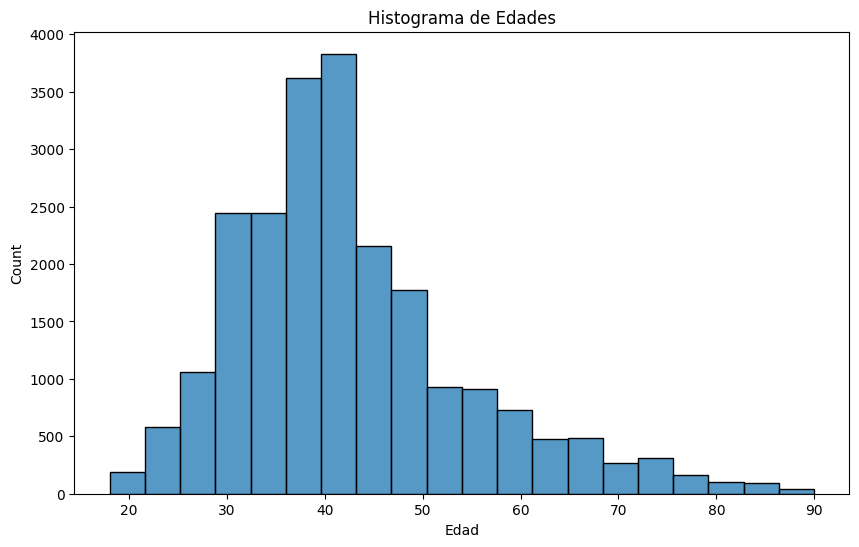

In [7]:
# Graficar histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(data=df_donantesi, x='Edad', bins=20)
plt.title('Histograma de Edades')
plt.show()

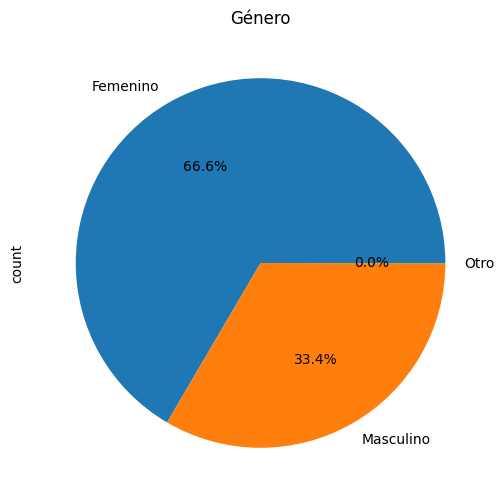

In [8]:
# Grafica de pie para el género
plt.figure(figsize=(10, 6))
df_donantesi['Género'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Género')
plt.show()

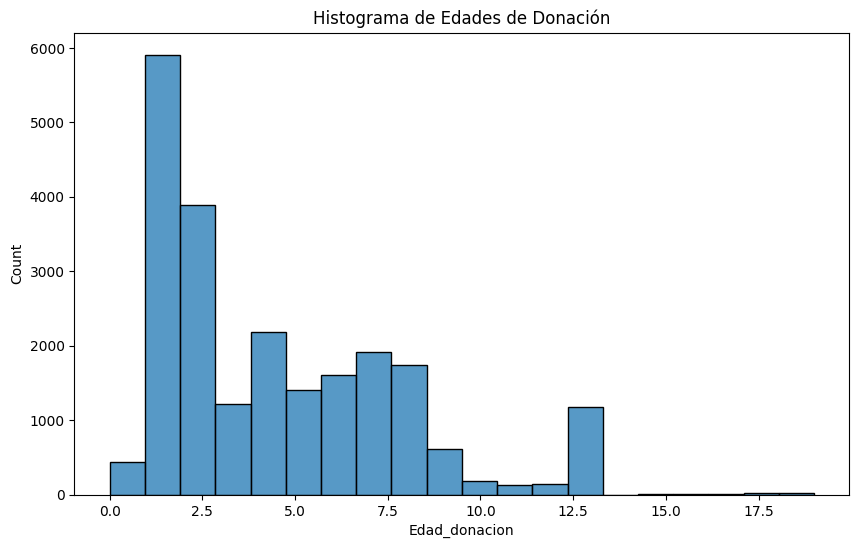

In [9]:
# Calcular edad del donante
df_donantesi['Edad_donacion'] = dt.datetime.now().year - df_donantesi['Fecha de Captación'].dt.year
# Graficar histograma de edades de donacion
plt.figure(figsize=(10, 6))
sns.histplot(data=df_donantesi, x='Edad_donacion', bins=20)
plt.title('Histograma de Edades de Donación')
plt.show()

In [10]:
# Pandas profiling para los datos
from ydata_profiling import ProfileReport

profile = ProfileReport(df_donantesi, title='Pandas Profiling Report', explorative=True)
profile.to_file('Pandas Profiling Report.html')

/Users/gabrielgomez/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 266.66it/s]


#### Exploración Datos de Transacciones

In [41]:
# Importar datos de transacciones individuales
df_transi = pd.read_csv('./Archivos_Cliente/Transacciones_Individuales.csv', sep=';', encoding='latin-1')
df_transi.head()

,PSN,Etapa,Fecha de Donación,Importe,Canal de la Campaña,Tipo de registro,Medio de Pago,Tipo de Compromiso,Fecha de Registro Contable,Fecha efectiva de primer cobro,Fecha de última donación,Estado/Tipo
0,1020449841,Perdida,18/01/2021,"30000,00",Click to Call,DI - Regular,Débito Automático,Primer Compromiso,NaN,18/08/2020,10/10/2021,Abierto
1,1020019970,Cobrada,1/02/2021,"15000,00",Multicanal,DI - Regular,Débito Automático,Primer Compromiso,1/02/2021,30/11/2015,1/07/2023,Abierto
2,1020355747,Perdida,27/02/2021,"20000,00",F2F,DI - Regular,Débito Automático,Primer Compromiso,NaN,27/02/2017,9/11/2021,Abierto
3,1020142210,Perdida,1/01/2021,"50000,00",F2F,PI - Padrinazgo individual,Débito Automático,Primer Compromiso,NaN,31/01/2015,NaN,Abierto
4,1020117113,Cobrada,1/01/2021,"30000,00",F2F,DI - Regular,Débito Automático,Primer Compromiso,4/01/2021,31/01/2015,1/01/2022,Cerrado


In [43]:
# Cambiar tipos de dato
df_transi['Fecha de Donación'] = pd.to_datetime(df_transi['Fecha de Donación'])
df_transi['Etapa'] = df_transi['Etapa'].astype('category')
df_transi['Importe'] = df_transi['Importe'].str.replace(',','.')
df_transi['Importe'] = df_transi['Importe'].astype(float)
df_transi['Canal de la Campaña'] = df_transi['Canal de la Campaña'].astype('category')
df_transi['Tipo de registro'] = df_transi['Tipo de registro'].astype('category')
df_transi['Medio de Pago'] = df_transi['Medio de Pago'].astype('category')
df_transi['Tipo de Compromiso'] = df_transi['Tipo de Compromiso'].astype('category')
df_transi['Fecha de Registro Contable'] = pd.to_datetime(df_transi['Fecha de Registro Contable'], format='mixed')
df_transi['Fecha efectiva de primer cobro'] = pd.to_datetime(df_transi['Fecha efectiva de primer cobro'])
df_transi['Fecha de última donación'] = pd.to_datetime(df_transi['Fecha de última donación'], format='mixed')
df_transi['Estado/Tipo'] = df_transi['Estado/Tipo'].astype('category')


/var/folders/xq/zz5zb6z90_73_lf9wzs007h40000gn/T/ipykernel_62488/3824629097.py:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_transi['Fecha efectiva de primer cobro'] = pd.to_datetime(df_transi['Fecha efectiva de primer cobro'])


In [44]:
# Tipos de transacciones
df_transi['Etapa'].value_counts()

Etapa
Cobrada             647701
Perdida             479267
Comprometida        203670
Enviada a cobrar     15269
Rechazada             2496
Eliminar               118
Name: count, dtype: int64

In [45]:
# Filtrar donaciones del futuro
df_trans_futuras = df_transi[df_transi['Fecha de Donación']>dt.datetime.now()]
df_trans_futuras['Etapa'].value_counts()

Etapa
Comprometida        184052
Perdida                263
Eliminar               110
Enviada a cobrar         1
Rechazada                1
Cobrada                  0
Name: count, dtype: int64

In [46]:
# Filtrar transacciones efectivas
df_trans_cobradas = df_transi[df_transi['Etapa']=='Cobrada']
df_trans_cobradas.describe()

,PSN,Fecha de Donación,Importe,Fecha de Registro Contable,Fecha efectiva de primer cobro,Fecha de última donación
count,6.477010e+05,647701,6.477010e+05,647700,647351,647697
mean,1.020357e+09,2022-05-09 20:09:20.280747008,3.595167e+04,2022-02-10 18:50:41.007873280,2019-11-08 14:56:58.835222016,2022-11-15 10:27:10.662485504
min,1.020000e+09,2021-01-01 00:00:00,1.000000e+00,2021-01-01 00:00:00,2015-01-01 00:00:00,2021-01-01 00:00:00
25%,1.020281e+09,2021-10-01 00:00:00,2.000000e+04,2021-05-04 00:00:00,2018-03-01 00:00:00,2023-01-07 00:00:00
50%,1.020440e+09,2022-06-01 00:00:00,3.000000e+04,2022-01-11 00:00:00,2020-05-05 00:00:00,2023-01-07 00:00:00
75%,1.020458e+09,2023-01-01 00:00:00,5.000000e+04,2023-01-02 00:00:00,2021-11-05 00:00:00,2023-02-08 00:00:00
max,1.020497e+09,2023-08-02 00:00:00,2.782162e+07,2023-12-07 00:00:00,2023-07-30 00:00:00,2023-12-07 00:00:00
std,1.415426e+05,NaN,7.287671e+04,NaN,NaN,NaN


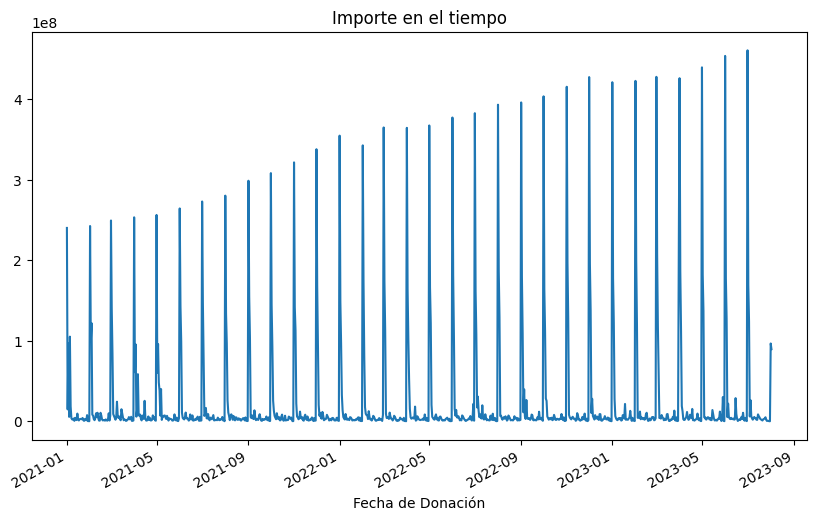

In [47]:
# Graficar de línea para el importe en el tiempo
plt.figure(figsize=(10, 6))
df_trans_cobradas.groupby('Fecha de Donación')['Importe'].sum().plot()
plt.title('Importe en el tiempo')
plt.show()

In [48]:
df = df_trans_cobradas.join(df_donantesi, on='PSN', how='inner')
df.head()

,PSN,Etapa,Fecha de Donación,Importe,Canal de la Campaña,Tipo de registro,Medio de Pago,Tipo de Compromiso,Fecha de Registro Contable,Fecha efectiva de primer cobro,...,Ocupación,Churn Probability,Lapsed Probability,RFM Segmento Actual,Otra Clasificación RFM Actual,Cantidad Cuotas Pagadas Global,Cantidad Cuotas No Pagadas Global,Campaña Inicial: Nombre,Donante Activo,Edad_donacion
1,1020019970,Cobrada,2021-02-01,15000.0,Multicanal,DI - Regular,Débito Automático,Primer Compromiso,2021-01-02,2015-11-30,...,NaN,0.09,0.0,Otra Clasificación,Constantes,230,18,AMIGOS,1,13
9718,1020019970,Cobrada,2022-01-04,15000.0,Multicanal,DI - Regular,Débito Automático,Nuevo por cambio de datos clave,2022-01-01,2018-02-19,...,NaN,0.09,0.0,Otra Clasificación,Constantes,230,18,AMIGOS,1,13
15522,1020019970,Cobrada,2021-12-01,15000.0,Multicanal,DI - Regular,Débito Automático,Primer Compromiso,2021-01-12,2015-11-30,...,NaN,0.09,0.0,Otra Clasificación,Constantes,230,18,AMIGOS,1,13
18951,1020019970,Cobrada,2021-11-01,15000.0,Multicanal,DI - Regular,Débito Automático,Primer Compromiso,2021-02-11,2015-11-30,...,NaN,0.09,0.0,Otra Clasificación,Constantes,230,18,AMIGOS,1,13
19197,1020019970,Cobrada,2021-06-01,15000.0,Multicanal,DI - Regular,Débito Automático,Primer Compromiso,2021-01-06,2015-11-30,...,NaN,0.09,0.0,Otra Clasificación,Constantes,230,18,AMIGOS,1,13


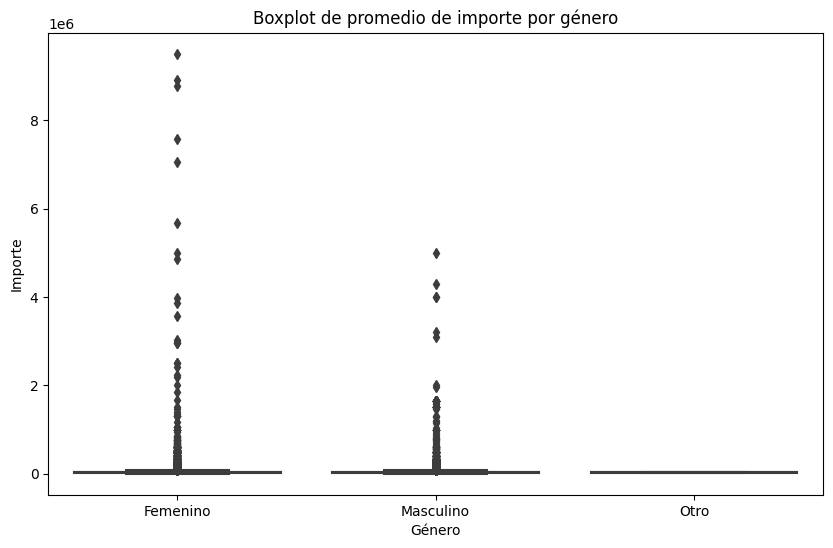

In [49]:
# Boxplot de promedio de importe por género
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Género', y='Importe')
plt.title('Boxplot de promedio de importe por género')
plt.show()

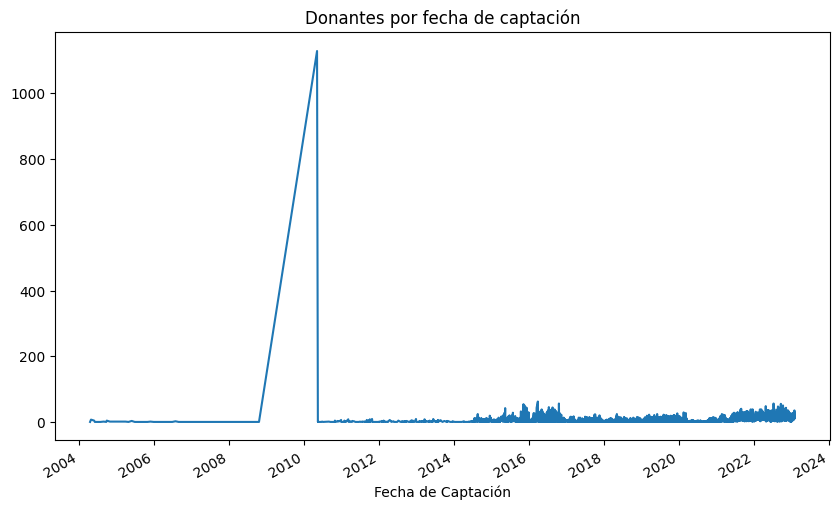

In [52]:
# Gráfica de donantes por fecha de captación
plt.figure(figsize=(10, 6))
df_donantesi.reset_index(inplace=True)
df_donantesi.groupby('Fecha de Captación')['PSN'].count().plot()
plt.title('Donantes por fecha de captación')
plt.show()